# TFT Simulation
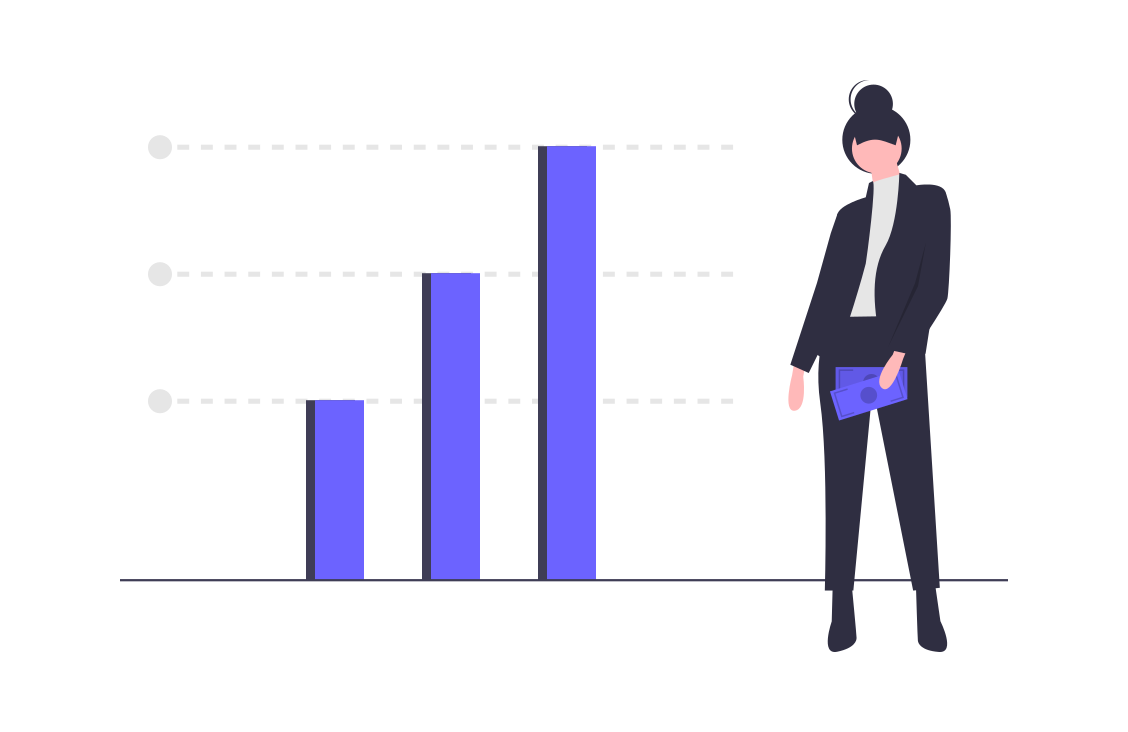

In [1]:
## Simulation Arguments 

In [1]:
from lib import *
simulation = j.tools.tfgrid_simulator.simulation_get(name="default", hardware_config_name="amd", reload=True)
startmonth = int(j.core.db.get("simulator:startmonth").decode())
server = simulation.environment.node_normalized


 - tft_growth: 3.0
 - node_growth: 0:5,6:150,12:1000,18:2000,24:8000,36:12000,48:20000,60:20000
 - cu_price_default: 15
 - su_price_default: 10


In [2]:
md(f"""

- nr of nodes at start: {simulation.nodebatches[0].nrnodes}
- nr of months left (avg out) for farming of startingnodes: {simulation.nodebatches[0].months_left}
- nr of TFT already farmed: { j.data.types.numeric.clean(simulation.nodebatches[0].tft_farmed_before_simulation)} 

""")


## Simulation Arguments 

- nr of nodes at start: 1500
- nr of months left (avg out) for farming of startingnodes: 36
- nr of TFT already farmed: 700,000,000 



## Device Details

In [3]:

md(f"""
### Device Details

- nr of TB netto usable = {round(server.su,1)} TB
- nr of cpu cores = {round(server.cru,1)} Cores
- power used = {server.power} watt
- performance in passmark = {round(server.cu_passmark*server.cu)}

""")


### Device Details

- nr of TB netto usable = 58.3 TB
- nr of cpu cores = 16.0 Cores
- power used = 232 watt
- performance in passmark = 24479



## Growth per month

In [4]:
simulation.graph_nr_nodes()

FigureWidget({
    'data': [{'name': 'new nodes',
              'type': 'scatter',
              'uid': '85b5c…

### Number of racks per month


In [5]:
x=np.arange(0,60)
cells= [int(i/44) for i in simulation.sheet.rows.rackspace_u.cells[0:60]]
fig = go.FigureWidget(data=go.Scatter(x=x, y=cells))
fig.update_layout(title = 'Racks Occupied per Month',showlegend=False)
# fig

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'ff51bc31-8030-47c1-96d5-9a9d130f8c9e',
 …

In [6]:
cells= [int(i) for i in simulation.sheet.rows.power_kw.cells[0:60]]
fig = go.FigureWidget(data=go.Scatter(x=x, y=cells))
fig.update_layout(title = 'Kwatt/h per Month used.',showlegend=False)
fig

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '58e5af0c-0381-442f-9e05-1b1f772819c1',
 …

## TFT Growth

In [7]:
names=["farmed","cultivated","sold","burned","farmer_income"]
def do(end):
    fig = go.FigureWidget()
    title = 'TFT Farmed, Cultivated, Sold, Burned per month, for batch month:%s.'%end
    xx=[i for i in range(1,end+1)]
    for i in range(5):
        name=names[i]
        cells=simulation.rows["tft_%s"%name].cells[1:end+1]
        fig.add_trace(go.Scatter(x=xx, y=cells,name=name))
    fig.update_layout(title = title,showlegend=True)
    return fig


In [8]:
do(12)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '391ed258…

In [9]:
do(30)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '958896f7…

In [10]:
do(60)

FigureWidget({
    'data': [{'name': 'farmed',
              'type': 'scatter',
              'uid': '641fca18…

In [11]:
fig1, fig2, fig3, fig4, fig5, fig6, fig7,fig8=simulation.graph_tft_simulation(show=False);

In [12]:
fig1

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'nrnodes_total',
              'type'…

In [13]:
fig2

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_farmed',
              'type': '…

In [14]:
fig8

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_marketcap',
              'type'…

In [15]:
fig3

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'tft_farmed_cumul',
              'ty…

In [16]:
fig4


FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'USD',
              'type': 'scatter…

In [17]:
fig5

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'multiple',
              'type': 'sc…

In [18]:
fig6

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'USD',
              'type': 'scatter…

In [19]:
fig7

FigureWidget({
    'data': [{'connectgaps': False,
              'name': 'multiple',
              'type': 'sc…

## Token price per month


In [20]:
simulation.graph_token_price()


FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '84d340a6-1a08-44ca-8c93-997579a7447c',
 …

In [21]:
# %qtconsole